###  This is the main notebook for the project:
##  "COVID-19 v. Political Affiliation in California by County"


### Outline for this notebook:
1. Load data set
2. Join data sets
3. Create Republican and Democrat DF's 
4. Graphics
    a. Mean NEW DAILY covid cases by Democratic/ Republican Counties
    b. Mean TOTAL DAILY covid cases by Democratic/ Republican Counties
    c. Mean cases per County (as a percent of the population) - ALL Dates
    d. Mean cases per County (as a percent of the population) - after reopening May 18th
    
5. Linear Regression Model for Republican Growth Rate and Democrat Growth Rate
6. Correlation Matrix
7. Hypothesis Testing
    * T-Test
    * MannWhitneyU Test 
    
    
For info on data cleaning and exploration PRIOR to joining the COVID and Political datasets please see the following notebooks: 
* Cali_covid_data_exploration
* Cali_political_population_data_exploration

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Bring in data sets
* political data ('data/major_candidates_df.csv')
* covid data set entire('data/covid_main_df.csv')
* Covid snapshot July-15 ('data/july_15_snapshot_covid_df')

In [86]:
major_candidates_df = pd.read_csv('../data/major_candidates_df.csv', index_col = 1)
covid_main_df = pd.read_csv('../data/covid_main_df.csv', index_col = 1)
covid_main_df['date']= pd.to_datetime(covid_main_df['date'])
july_15_snapshot_df = pd.read_csv('../data/july_15_snapshot_covid_df', index_col = 1)
july_15_snapshot_df['date']= pd.to_datetime(july_15_snapshot_df['date'])

In [87]:
try:
    major_candidates_df.drop(axis=1, columns='Unnamed: 0', inplace=True)
    covid_main_df.drop(axis=1, columns='Unnamed: 0', inplace=True)
    july_15_snapshot_df.drop(axis=1, columns='Unnamed: 0', inplace=True)
except:
    pass

### 2. Join the data
* BIG data set = covid_political_master
* Day snapshot = covid_political_July15_df

In [88]:
covid_political_master_df = covid_main_df.join(major_candidates_df, how='inner')
#covid_political_master_df.head(1)

In [89]:
covid_political_July15_df = july_15_snapshot_df.join(major_candidates_df, how='inner')
#covid_political_July15_df.head(1)

### 3. Create Republican and Democrat DF's / Explore data

In [90]:
# create dem and rep dataframes
dems_df = covid_political_master_df[covid_political_master_df['Aff_Code'] == 1]
# dems_df.head()

repub_df = covid_political_master_df[covid_political_master_df['Aff_Code'] == 0]
#repub_df.head(1)

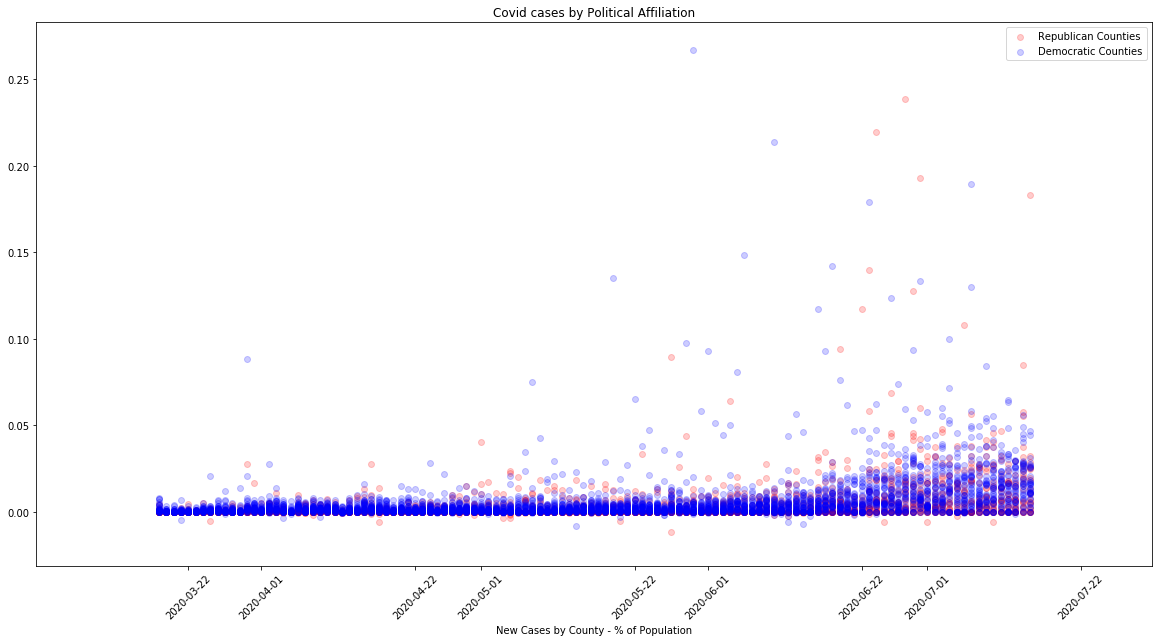

In [91]:
fig, ax = plt.subplots(figsize = (20,10))



ax.scatter(repub_df['date'], repub_df['%_pop_new_cases'],  alpha = 0.2, color= 'red', label = 'Republican Counties ')
ax.scatter(dems_df['date'], dems_df['%_pop_new_cases'], alpha = 0.2, color = 'blue', label = 'Democratic Counties')
ax.set_title('Covid cases by Political Affiliation');
ax.set_xlabel('New Cases by County - % of Population')
plt.xticks(rotation=45)
#ax.set_xlim(0, .1)
ax.legend();
plt.savefig('../images/each_county_cases_per_day.png')

### a. Mean NEW DAILY covid cases by Democratic/ Republican Counties

In [92]:
mean_daily_new_cases_dem = dems_df.groupby('date')['%_pop_new_cases'].mean().reset_index()
#mean_daily_new_cases_dem.head(1)

In [93]:
mean_daily_new_cases_repub = repub_df.groupby('date')['%_pop_new_cases'].mean().reset_index()
#mean_daily_new_cases_repub.head(1)

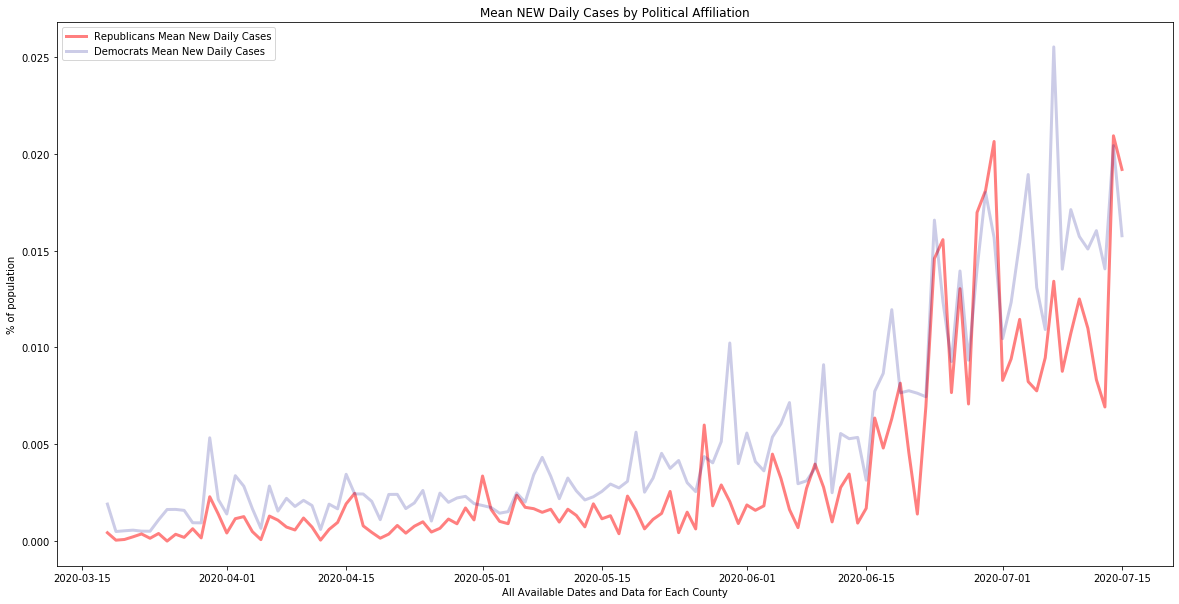

In [94]:
import sys
sys.path.insert(0, '/Users/megan/Galvanize/capstone_folder/Capstone_1')

from src.scripts import double_line_plot

double_line_plot(mean_daily_new_cases_repub,
                 mean_daily_new_cases_dem, 
                 'Mean NEW Daily Cases by Political Affiliation', 
                 'All Available Dates and Data for Each County',
               '% of population', 'Republicans Mean New Daily Cases', 'Democrats Mean New Daily Cases', filename = 'dem_repub_meandailyNEWcases_Map_5')

## b. Mean TOTAL DAILY covid cases by Democratic/ Republican Counties

In [95]:
mean_daily_total_cases_dem = dems_df.groupby('date')['%_pop_total_cases'].mean().reset_index()
#mean_daily_total_cases_dem.tail(1)

In [96]:
mean_daily_total_cases_repub = repub_df.groupby('date')['%_pop_total_cases'].mean().reset_index()
#mean_daily_total_cases_repub.head(1)

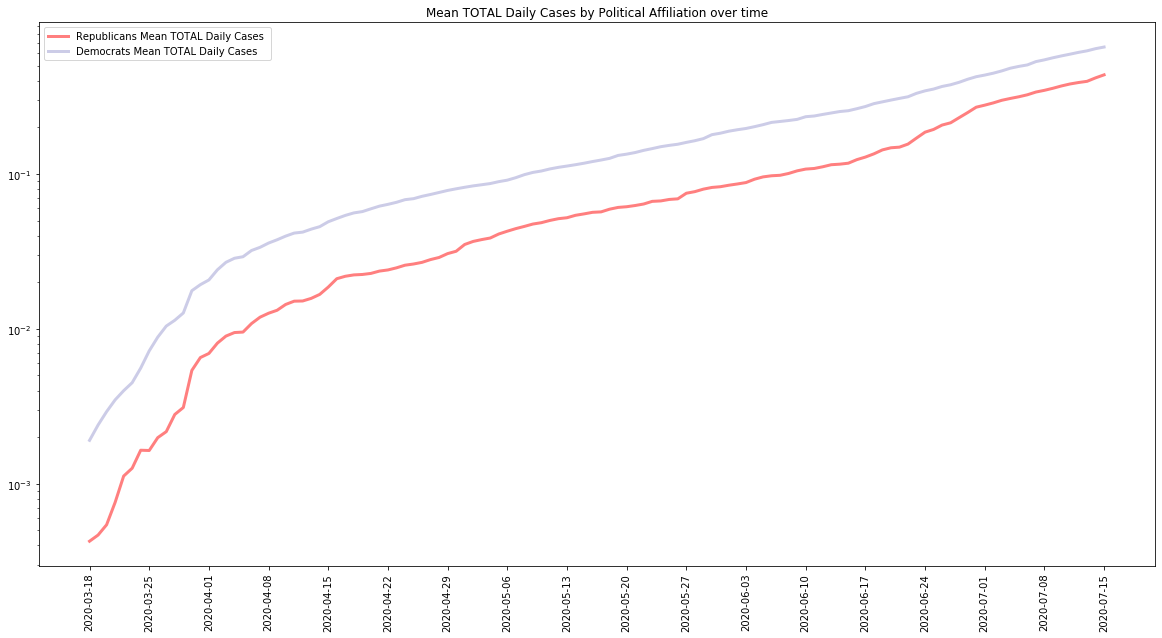

In [97]:
fig, ax = plt.subplots(figsize = (20,10))

ax.plot(mean_daily_total_cases_repub['date'], mean_daily_total_cases_repub['%_pop_total_cases'],  alpha = 0.5, linewidth=3, color='red', label = 'Republicans Mean TOTAL Daily Cases ')
ax.plot(mean_daily_total_cases_dem['date'], mean_daily_total_cases_dem['%_pop_total_cases'], alpha = 0.2, linewidth=3, color = 'darkblue', label = 'Democrats Mean TOTAL Daily Cases')
ax.set_title('Mean TOTAL Daily Cases by Political Affiliation over time');
#ax.set_xlabel('3/18/2020 - 07/15/2020')
plt.xticks(mean_daily_total_cases_dem['date'][0::7], rotation=90)
#ax.set_xticklabels(rotation=90)
# ax.set_xlim(0, .1)
ax.set_yscale('log')
ax.legend();


plt.savefig('../images/dem_repub_meandailyTOTALcases_Map_6.png')

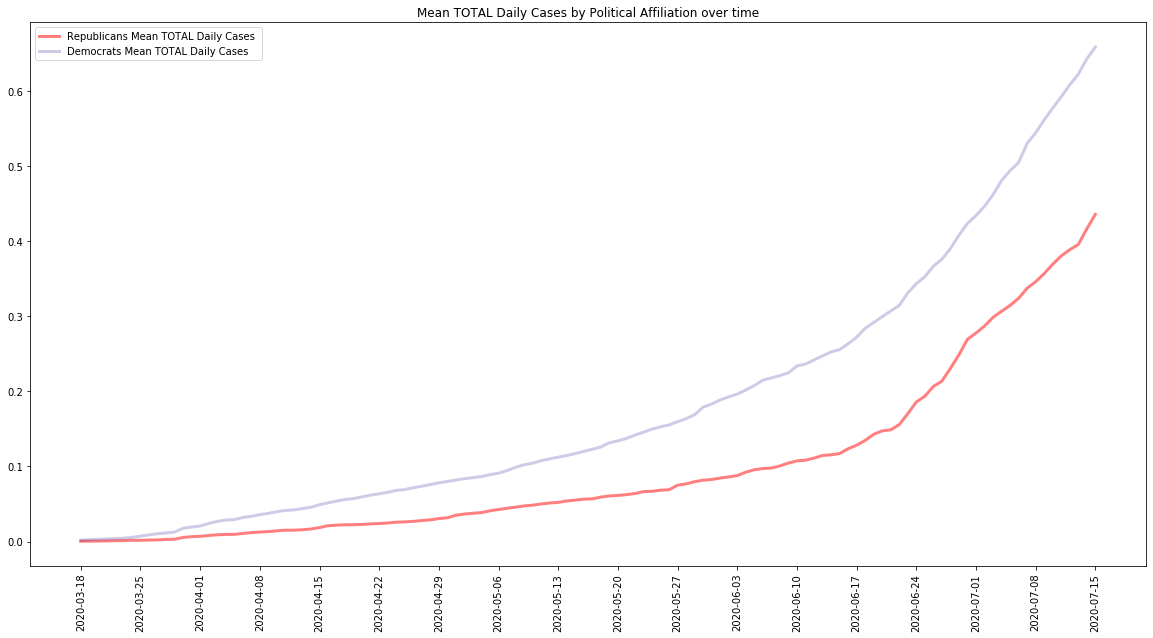

In [98]:
fig, ax = plt.subplots(figsize = (20,10))

ax.plot(mean_daily_total_cases_repub['date'], mean_daily_total_cases_repub['%_pop_total_cases'],  alpha = 0.5, linewidth=3, color='red', label = 'Republicans Mean TOTAL Daily Cases ')
ax.plot(mean_daily_total_cases_dem['date'], mean_daily_total_cases_dem['%_pop_total_cases'], alpha = 0.2, linewidth=3, color = 'darkblue', label = 'Democrats Mean TOTAL Daily Cases')
ax.set_title('Mean TOTAL Daily Cases by Political Affiliation over time');
#ax.set_xlabel('3/18/2020 - 07/15/2020')
plt.xticks(mean_daily_total_cases_dem['date'][0::7], rotation=90)
#ax.set_xticklabels(rotation=90)
# ax.set_xlim(0, .1)
#ax.set_yscale('log')
ax.legend();


plt.savefig('../images/dem_repub_meandailyTOTALcases_Map_8.png')

### c. Mean cases per County (as a percent of the population) - ALL Dates

In [99]:
# currently for all days, WOULD BE INTERESTING ro do it after reopening.
mean_COUNTY_total_cases_dem = dems_df.groupby(['County','%_Republican'] )['%_pop_total_cases'].mean().reset_index()
mean_COUNTY_total_cases_dem.sort_values('%_pop_total_cases', inplace=True)
mean_COUNTY_total_cases_dem.head(3)

,County,%_Republican,%_pop_total_cases
33,Trinity,45.118041,0.007394
11,Mendocino,22.190581,0.030327
2,Butte,44.308922,0.031628


In [100]:
mean_COUNTY_total_cases_repub = repub_df.groupby(['County','%_Republican'])['%_pop_total_cases'].mean().reset_index()
mean_COUNTY_total_cases_repub.sort_values('%_pop_total_cases', inplace=True)
mean_COUNTY_total_cases_repub.head(3)

,County,%_Republican,%_pop_total_cases
11,Modoc,70.254958,0.000218
15,Sierra,54.813530,0.015229
20,Tuolumne,52.543403,0.015236


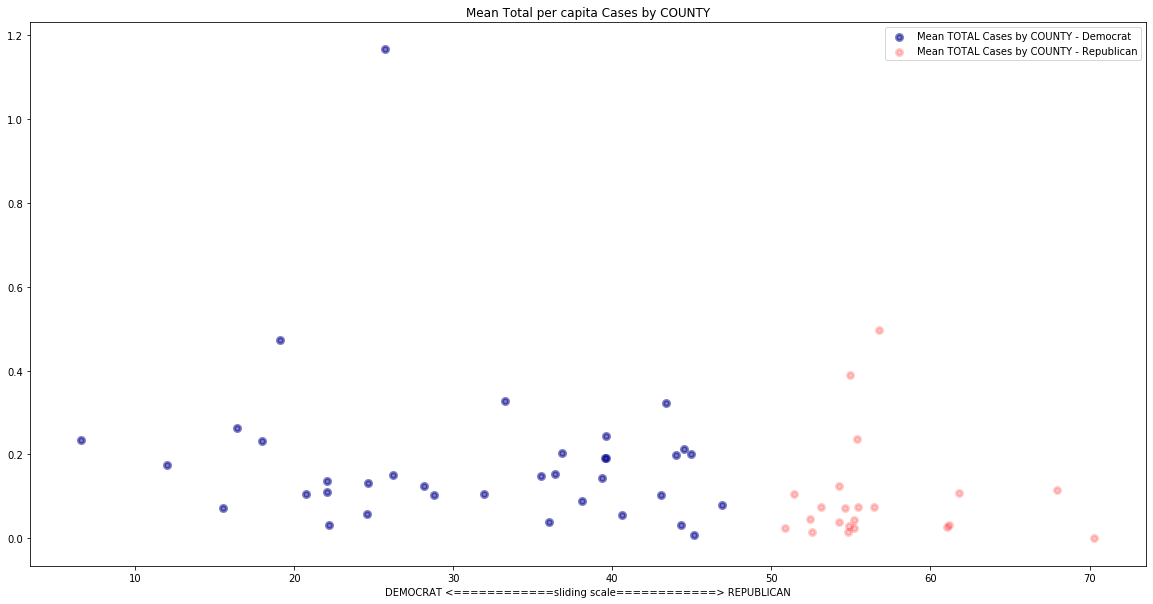

In [101]:
fig, ax = plt.subplots(figsize = (20,10))

ax.scatter(mean_COUNTY_total_cases_dem['%_Republican'], mean_COUNTY_total_cases_dem['%_pop_total_cases'],  alpha = 0.5, linewidth=3, color='darkblue', label = 'Mean TOTAL Cases by COUNTY - Democrat')
ax.scatter(mean_COUNTY_total_cases_repub['%_Republican'], mean_COUNTY_total_cases_repub['%_pop_total_cases'], alpha = 0.2, linewidth=3, color = 'red', label = 'Mean TOTAL Cases by COUNTY - Republican')
ax.set_title('Mean Total per capita Cases by COUNTY');
ax.set_xlabel('DEMOCRAT <============sliding scale============> REPUBLICAN')
#plt.xticks(mean_COUNTY_total_cases_dem['date'][0::7], rotation=90)
#ax.set_xticklabels(rotation=90)
#ax.set_xlim(0, .1)
ax.legend();

plt.savefig('../images/dem_repub_meanTOTALcases_sliding_scale_7.png')

### d. Mean cases per County (as a percent of the population) - Dates after state reopening May 18th 

In [102]:
#create df for democratic counties after reopen
after_reopen_dems_df = dems_df.loc[dems_df['date'] >= '2020-05-18']
mean_COUNTY_total_cases_dem_after_reopen = after_reopen_dems_df.groupby(['County','%_Republican'] )['%_pop_total_cases'].mean().reset_index()
mean_COUNTY_total_cases_dem_after_reopen.sort_values('%_pop_total_cases', inplace=True)
mean_COUNTY_total_cases_dem_after_reopen.head(3)

,County,%_Republican,%_pop_total_cases
33,Trinity,45.118041,0.013659
11,Mendocino,22.190581,0.054961
2,Butte,44.308922,0.058444


In [103]:
#create df for republican counties after reopen
after_reopen_repub_df = repub_df.loc[repub_df['date'] >= '2020-05-18']
mean_COUNTY_total_cases_repub_after_reopen = after_reopen_repub_df.groupby(['County','%_Republican'] )['%_pop_total_cases'].mean().reset_index()
mean_COUNTY_total_cases_repub_after_reopen.sort_values('%_pop_total_cases', inplace=True)
mean_COUNTY_total_cases_repub_after_reopen.head(3)

,County,%_Republican,%_pop_total_cases
11,Modoc,70.254958,0.000383
20,Tuolumne,52.543403,0.028281
15,Sierra,54.813530,0.030458


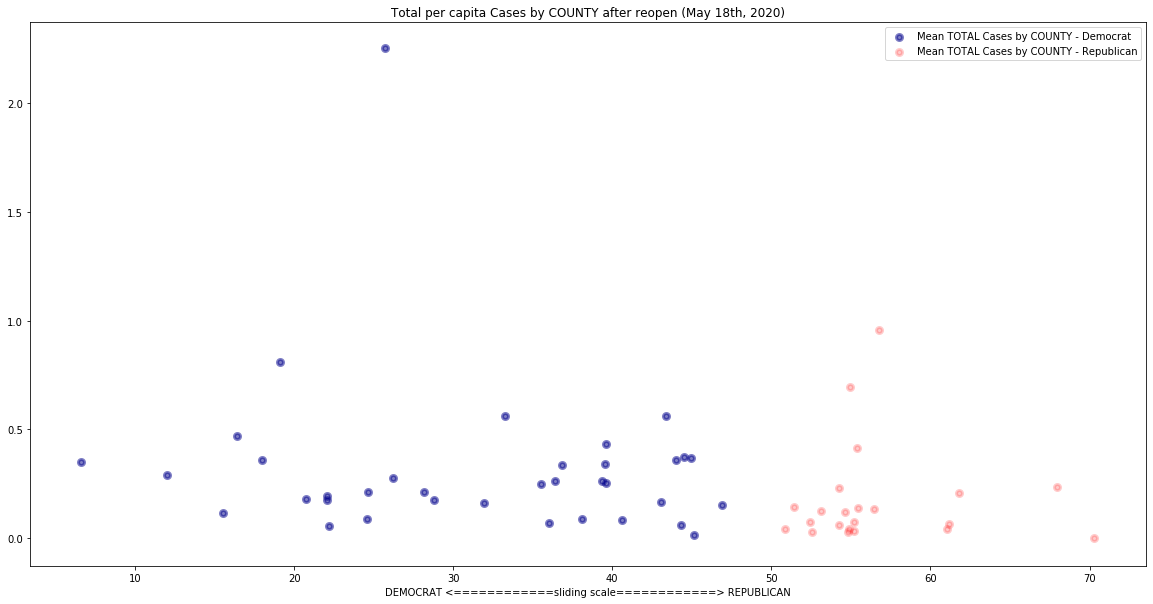

In [104]:
fig, ax = plt.subplots(figsize = (20,10))

ax.scatter(mean_COUNTY_total_cases_dem_after_reopen['%_Republican'], mean_COUNTY_total_cases_dem_after_reopen['%_pop_total_cases'],  alpha = 0.5, linewidth=3, color='darkblue', label = 'Mean TOTAL Cases by COUNTY - Democrat')
ax.scatter(mean_COUNTY_total_cases_repub_after_reopen['%_Republican'], mean_COUNTY_total_cases_repub_after_reopen['%_pop_total_cases'], alpha = 0.2, linewidth=3, color = 'red', label = 'Mean TOTAL Cases by COUNTY - Republican')
ax.set_title('Total per capita Cases by COUNTY after reopen (May 18th, 2020)');
ax.set_xlabel('DEMOCRAT <============sliding scale============> REPUBLICAN')
#plt.xticks(mean_COUNTY_total_cases_dem['date'][0::7], rotation=90)
#ax.set_xticklabels(rotation=90)
#ax.set_xlim(0, .1)
ax.legend();

plt.savefig('../images/dem_repub_meanTOTALcases_sliding_scale_after reopen_8.png')

### 5. Linear Regression Model for Republican Growth Rate and Democrat Growth Rate


In [105]:
from sklearn.linear_model import LinearRegression as LR
X = (mean_daily_total_cases_repub['date'] - mean_daily_total_cases_repub['date'].min()).values.reshape(-1,1)/86400000000000
repub_model = LR().fit(X,  
    np.log(mean_daily_total_cases_repub['%_pop_total_cases']))
repub_growth_rate = np.exp(repub_model.coef_)
repub_growth_rate

array([1.04459018])

In [106]:
X = (mean_daily_total_cases_dem['date'] - mean_daily_total_cases_dem['date'].min()).values.reshape(-1,1)/86400000000000
dem_model = LR().fit(X,  
    np.log(mean_daily_total_cases_dem['%_pop_total_cases']))
dem_growth_rate = np.exp(dem_model.coef_)
dem_growth_rate

array([1.03707446])

In [107]:
#what does the intercept mean?
repub_model.intercept_, dem_model.intercept_

(-5.748803869835946, -4.46955567946708)

### 6. Correlation Matrix 

In [108]:
covid_political_July15_df.corr(method='pearson').round(3)

,totalcountconfirmed,totalcountdeaths,newcountconfirmed,newcountdeaths,Rank,Population,%_pop_new_cases,%_pop_total_cases,Hillary Clinton,Bernie Sanders,Donald Trump,John R. Kasich,Ted Cruz,Ben Carson,Republican Votes,Democratic Votes,%_Republican,%_Democrat,Aff_Code
totalcountconfirmed,1.000,0.992,0.973,0.877,-0.437,0.964,0.093,0.297,0.955,0.948,0.785,0.840,0.894,0.860,0.812,0.952,-0.234,0.234,0.211
totalcountdeaths,0.992,1.000,0.944,0.845,-0.362,0.938,0.075,0.260,0.946,0.937,0.722,0.800,0.848,0.809,0.754,0.943,-0.221,0.221,0.169
newcountconfirmed,0.973,0.944,1.000,0.864,-0.509,0.970,0.145,0.273,0.935,0.930,0.848,0.866,0.931,0.907,0.867,0.933,-0.224,0.224,0.246
newcountdeaths,0.877,0.845,0.864,1.000,-0.445,0.881,0.082,0.344,0.827,0.826,0.863,0.847,0.884,0.867,0.871,0.827,-0.167,0.167,0.237
Rank,-0.437,-0.362,-0.509,-0.445,1.000,-0.590,-0.055,-0.354,-0.548,-0.554,-0.670,-0.659,-0.639,-0.686,-0.671,-0.551,0.519,-0.519,-0.499
Population,0.964,0.938,0.970,0.881,-0.590,1.000,0.086,0.254,0.982,0.979,0.890,0.941,0.964,0.948,0.913,0.981,-0.309,0.309,0.292
%_pop_new_cases,0.093,0.075,0.145,0.082,-0.055,0.086,1.000,0.263,0.053,0.049,0.094,0.052,0.095,0.090,0.089,0.051,0.195,-0.195,-0.068
%_pop_total_cases,0.297,0.260,0.273,0.344,-0.354,0.254,0.263,1.000,0.219,0.206,0.233,0.203,0.250,0.238,0.233,0.213,-0.171,0.171,0.179
Hillary Clinton,0.955,0.946,0.935,0.827,-0.548,0.982,0.053,0.219,1.000,0.997,0.808,0.912,0.909,0.887,0.840,0.999,-0.386,0.386,0.298
Bernie Sanders,0.948,0.937,0.930,0.826,-0.554,0.979,0.049,0.206,0.997,1.000,0.817,0.917,0.913,0.893,0.848,0.999,-0.397,0.397,0.311


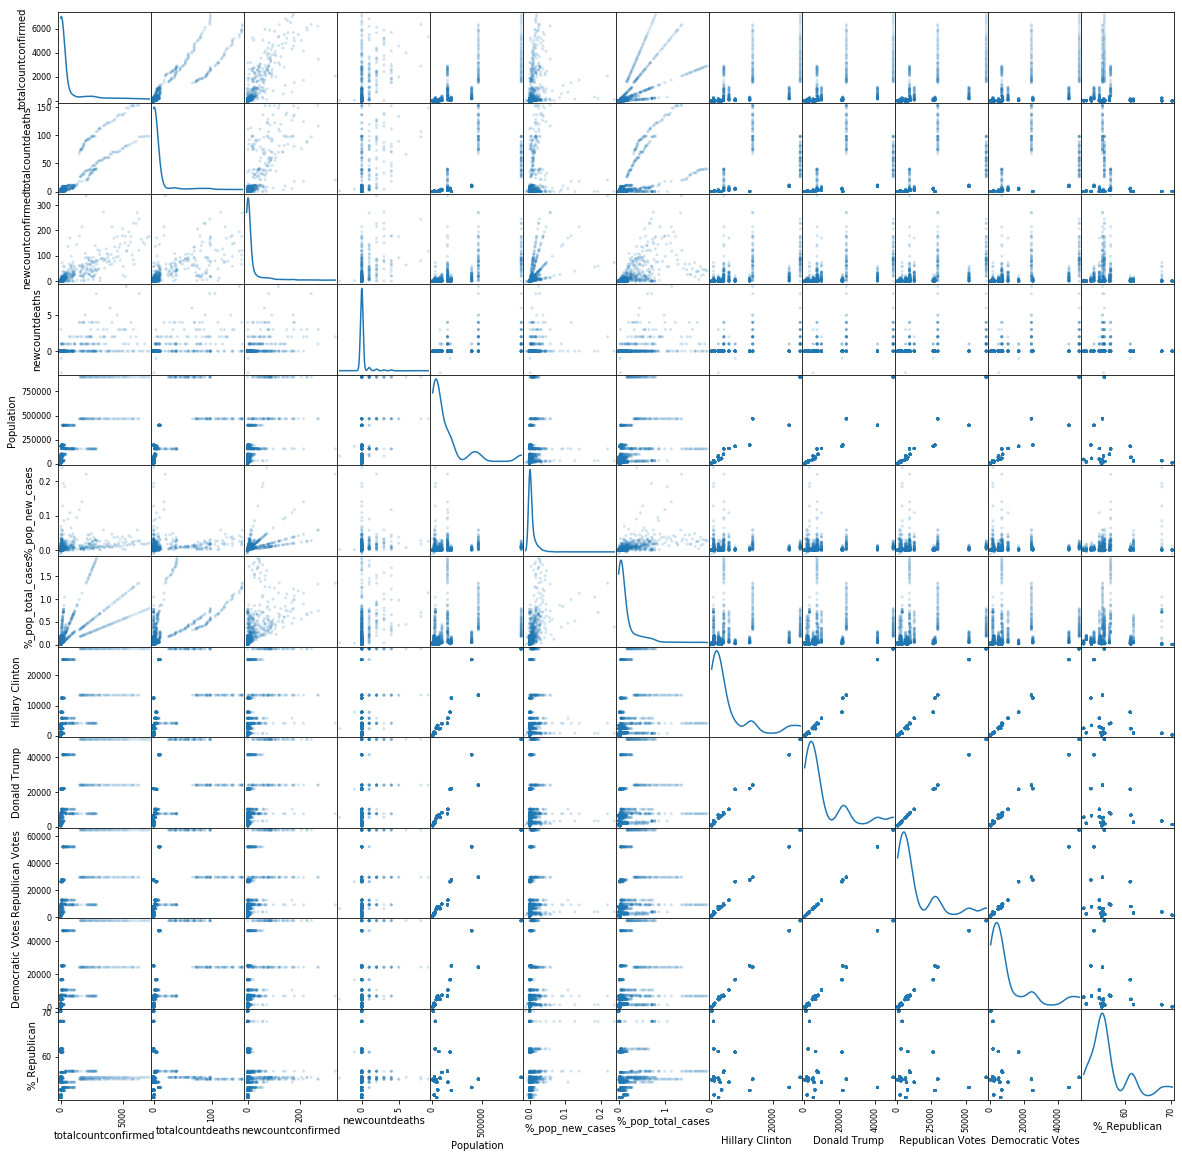

In [109]:

from pandas.plotting import scatter_matrix
scatter_cols = ['totalcountconfirmed', 'totalcountdeaths', 'newcountconfirmed',
       'newcountdeaths', 'Population', '%_pop_new_cases',
       '%_pop_total_cases', 'Hillary Clinton',
       'Donald Trump',
       'Republican Votes', 'Democratic Votes', '%_Republican']
df_sub = after_reopen_repub_df[scatter_cols]
scatter_matrix(df_sub, alpha = 0.2, figsize = (20, 20), diagonal = 'kde');

### 7. Hypothesis Testing

**H null: there is no difference between COVID rates from Republican and Democratic Counties**

**H alt: there is a difference between COVID rates in Republican and Democratic Counties**

* Sample 1: Democratic Counties: mean county total cases by % of population

* Sample 2: Republican Counties: mean county total cases by % of population

alpha = .05

### T-test

In [110]:
from scipy.stats import ttest_ind
sample_1 = mean_COUNTY_total_cases_dem['%_pop_total_cases']
sample_2 = mean_COUNTY_total_cases_repub['%_pop_total_cases']

In [111]:
t_statistic, p_value = ttest_ind(sample_1, sample_2, equal_var=False)

f't_statistic: {t_statistic}, p_value: {p_value}'

't_statistic: 2.0367313318783062, p_value: 0.046430414652248744'

**Conclusion of TTEST: Reject the Null Hypothesis. Accept the Alt Hypothesis** 

In [112]:
len(sample_1), len(sample_2)

(36, 22)

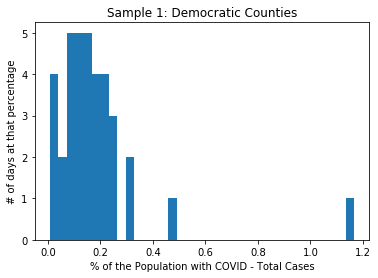

In [113]:
plt.hist(sample_1, bins=36)
plt.xlabel('% of the Population with COVID - Total Cases')
plt.ylabel('# of days at that percentage')
plt.title('Sample 1: Democratic Counties')
# ax.set_title('Sample 1: Democratic Counties');
# ax.set_xlabel('% of the Population - Total Cases')
ax.legend();

plt.savefig('../images/ttest_dems.png')

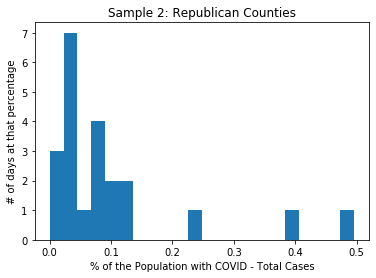

In [114]:
plt.hist(sample_2, bins=22)
plt.xlabel('% of the Population with COVID - Total Cases')
plt.ylabel('# of days at that percentage')
plt.title('Sample 2: Republican Counties')

plt.savefig('../images/ttest_repubs.png')

### Mann Whitney U Test

* After looking at the distributions of Sample1 and Sample2 we noticed that they do not look normal. Kin-Yip suggested running a MW test

* Sample_3: July 15th (last day) snapshot - Democrats
* Sample_4: July 15 (last day) snapshot - Republicans

In [115]:
# use the covid snapshot data,ie last date  

from scipy.stats import mannwhitneyu

#create dem and repub DF
dems_covid_political_July15_df = covid_political_July15_df.loc[covid_political_July15_df['Aff_Code'] == 1]
repub_covid_political_July15_df = covid_political_July15_df.loc[covid_political_July15_df['Aff_Code'] == 0]

#create samples
sample_3 = dems_covid_political_July15_df['%_pop_total_cases']
sample_4 = repub_covid_political_July15_df['%_pop_total_cases']

#run test
stats_value, p_value = mannwhitneyu(sample_3, sample_4, use_continuity=True, alternative=None)
print(f'Mann-Whitney U statistic: {stats_value}, p-Value: {p_value}')

Mann-Whitney U statistic: 269.0, p-Value: 0.021321946830712007


**Conclusion of Mann-Whitney U: Reject the Null Hypothesis. Accept the Alt Hypothesis**

In [116]:
len(sample_3), len(sample_4)


(36, 22)

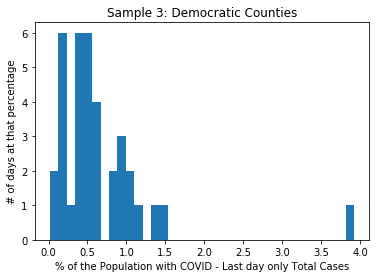

In [117]:
plt.hist(sample_3, bins=36)

plt.xlabel('% of the Population with COVID - Last day only Total Cases')
plt.ylabel('# of days at that percentage')
plt.title('Sample 3: Democratic Counties')

plt.savefig('../images/mwU_dems.png')

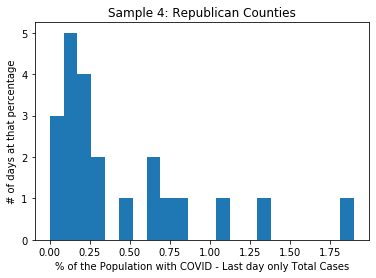

In [118]:
plt.hist(sample_4, bins=22)

plt.xlabel('% of the Population with COVID - Last day only Total Cases')
plt.ylabel('# of days at that percentage')
plt.title('Sample 4: Republican Counties')

plt.savefig('../images/mwU_repubs.png')